<a href="https://colab.research.google.com/github/J0FR/Proyecto1__Entrega1_BI/blob/main/Proyecto1E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install inflect
!pip install scikit-plot
!pip install num2words
!pip install scikit-learn==1.2.2
!pip install imblearn
!pip install pyspellchecker
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=805508cb6f773ab8417a4238c69ba732d971aef70181f45600779ae0c63a058b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=5262ed68ea428098ad48e7b971bdb29acfbe71e8989161380276c1f73cc3170a
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import sys
# !{sys.executable} -m pip install pandas-profiling
# !pip install pandas==2.0.0

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import RidgeClassifier, LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from tqdm.notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df=pd.read_csv("/content/entrenamiento_estudiantes.csv")

# **1 ENTENDIMIENTO DE LOS DATOS**

## 1.1  Número de Registros y Columnas

In [ ]:
df.shape

(7875, 2)

## 1.2 Tipo de Datos

In [ ]:
df.dtypes

Review    object
Class      int64
dtype: object

## 1.3  Primeros Registros

In [ ]:
df.head()

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2


## 1.4  Descripción de los Datos

In [ ]:
df.describe()

,Class
count,7875.000000
mean,3.491683
std,1.328275
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


## 1.5  Cantidad de Nulos por Columna

In [ ]:
df.isna().sum()

Review    0
Class     0
dtype: int64

## 1.6  Cantidad de Únicos por Columna

In [ ]:
df.nunique()

Review    7804
Class        5
dtype: int64

## 1.7  Histograma de los Datos

array([[<Axes: title={'center': 'Class'}>]], dtype=object)

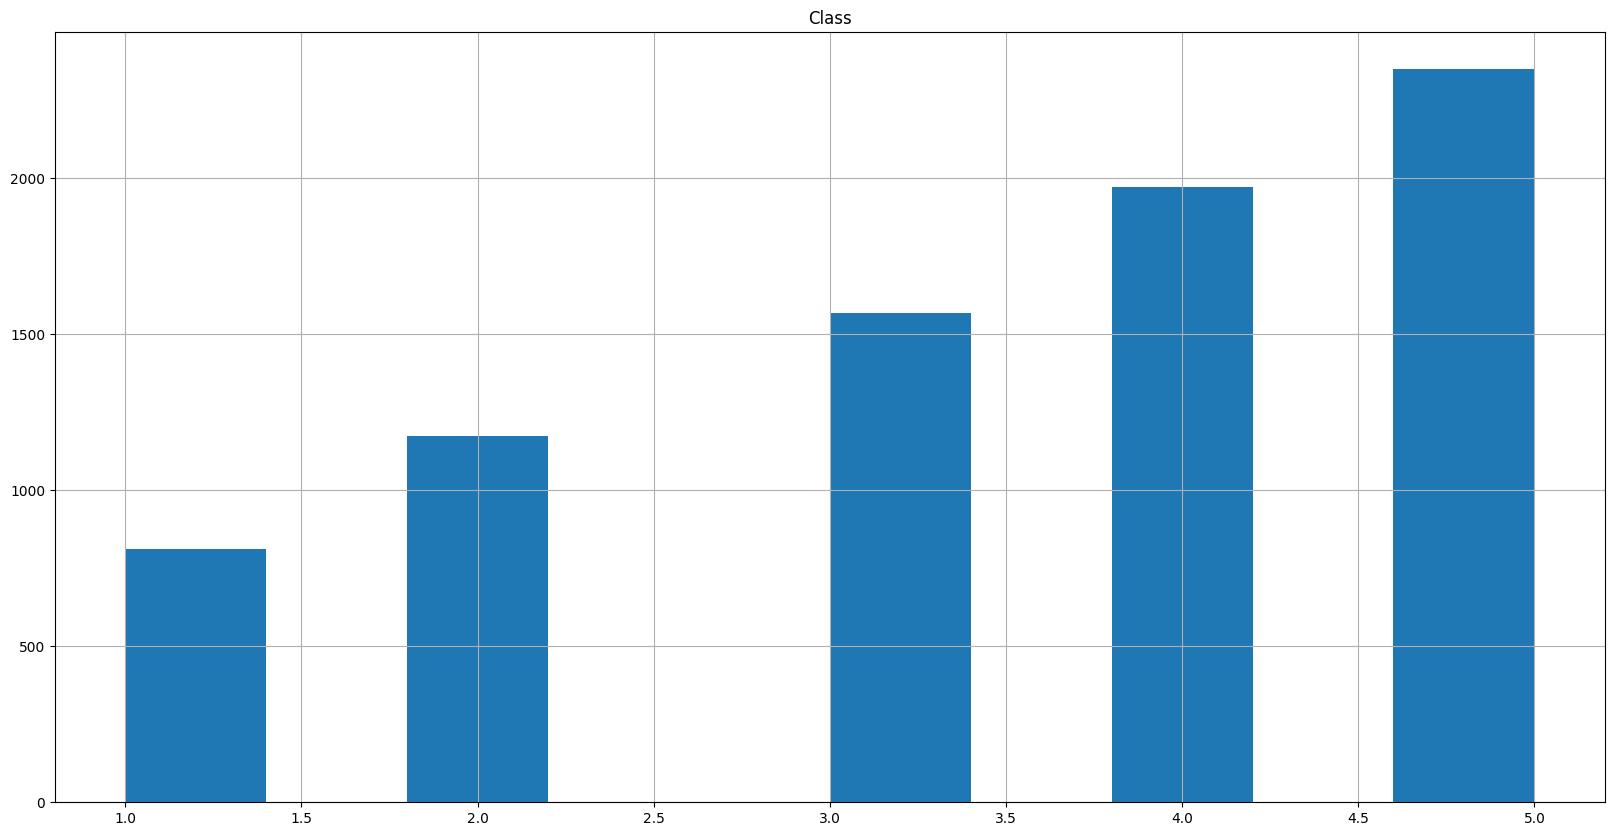

In [ ]:
%matplotlib inline
df.hist(figsize=(20,10))

## 1.8 Análisis de la Variable Objetivo

In [ ]:
pd.value_counts(df['Class'])

Class
5    2350
4    1971
3    1568
2    1173
1     813
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


## 1.8 Análisis de la Variable Review

1.8.1. Grafica que muestre la distribución de la longitud de los datos en la columna Review

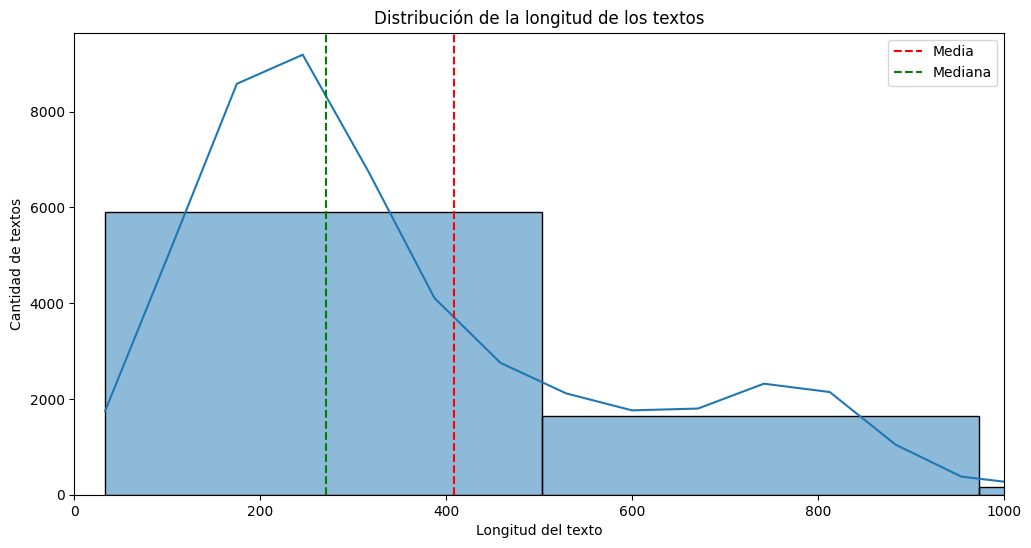

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Mirar la cantidad de palabras y hacer el grafico
df['longitud'] = df['Review'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud'], bins=30, kde=True)
plt.xlim(0, 1000)

# Configurar etiquetas de los ejes y título del gráfico
plt.xlabel('Longitud del texto')
plt.ylabel('Cantidad de textos')
plt.title('Distribución de la longitud de los textos')

# Mostrar la tendencia central de los datos
plt.axvline(x=df['longitud'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(x=df['longitud'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()

# Mostrar el gráfico
plt.show()

# Eliminar la columna 'longitud' debido a que no nos sirve para la creación de los modelos
df.drop('longitud', axis=1, inplace=True)



1.8.2 Grafica que nos muestra cuales son las palabras mas comunes en la columna Review teniendo en cuenta que no se tienen StopWords

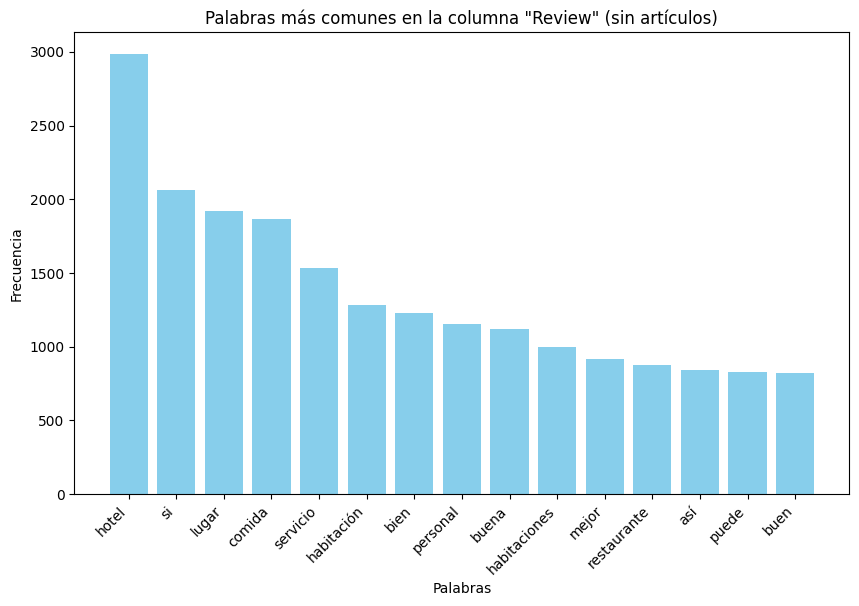

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


stop_words = set(stopwords.words('spanish'))

# Concatenar todos los textos en la columna 'Review'
all_text = ' '.join(df['Review'])
words = all_text.split()

# Filtrar palabras que no sean stopwords
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
word_freq = Counter(filtered_words)

# Seleccionar las palabras más comunes y mirar la frecuencia de los datos
num_words = 15
common_words = [(word, freq) for word, freq in word_freq.items() if word.isalpha()]
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)[:num_words]
words, frequencies = zip(*common_words)

# Visualizar las palabras más comunes en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Palabras más comunes en la columna "Review" (sin artículos)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


1.8.2 Mostrar grafica de Bigramas y Trigramas de la columna Review

1.8.2.1 Mostrar grafica de Bigramas mas comunes

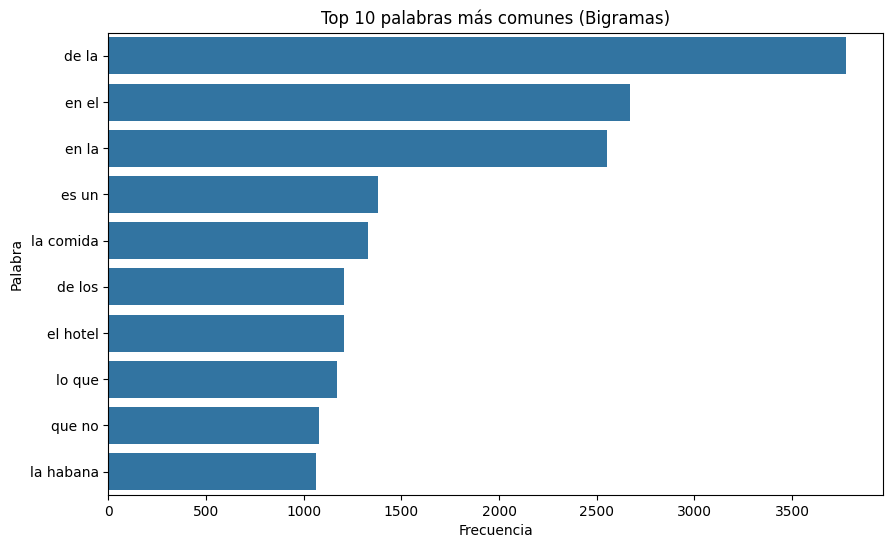

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Suponiendo que `df['Review']` contiene el corpus de textos
common_words = get_top_n_words(df['Review'], 10)

# Convertir la lista de tuplas a dos listas separadas para el gráfico
words = [word[0] for word in common_words]
freqs = [freq[1] for freq in common_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words)
plt.title('Top 10 palabras más comunes (Bigramas)')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()


1.8.2.2 Mostrar la grafica de los trigramas

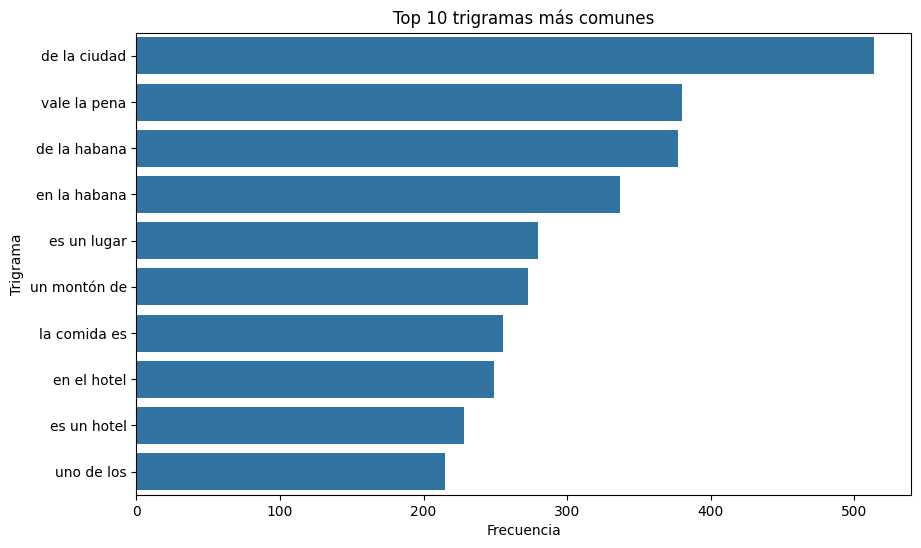

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)  # Cambiamos el rango a trigramas
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Suponiendo que `df['Review']` contiene el corpus de textos
common_words = get_top_n_words(df['Review'], 10)

# Convertir la lista de tuplas a dos listas separadas para el gráfico
words = [word[0] for word in common_words]
freqs = [freq[1] for freq in common_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words)
plt.title('Top 10 trigramas más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Trigrama')
plt.show()


1.8.3 Mostrar la grafica con las palabras mas largas de la columna Review

<ipython-input-47-6d471f4282e2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lengths, y=words, palette="viridis")


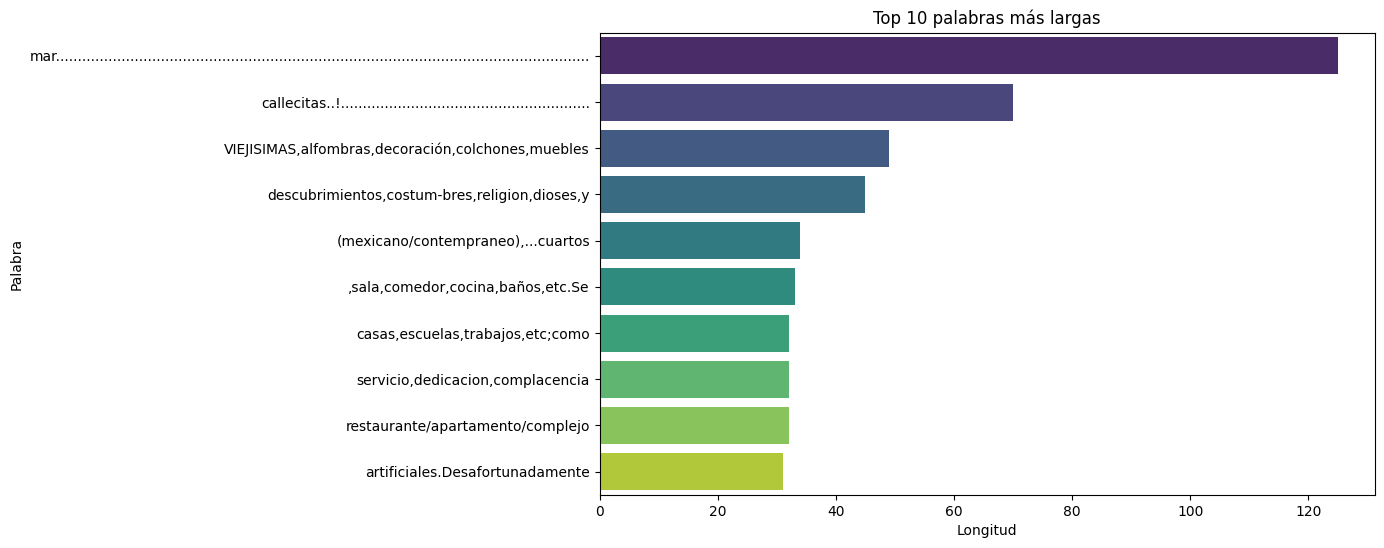

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_longest_words(corpus, n=10):
    words = ' '.join(corpus).split()
    words_lengths = [(word, len(word)) for word in words]
    words_lengths_sorted = sorted(words_lengths, key=lambda x: x[1], reverse=True)
    return words_lengths_sorted[:n]

longest_words = get_top_longest_words(df['Review'], 10)
words = [word[0] for word in longest_words]
lengths = [length[1] for length in longest_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=lengths, y=words, palette="viridis")
plt.title('Top 10 palabras más largas')
plt.xlabel('Longitud')
plt.ylabel('Palabra')
plt.show()


# **2 LIMPIEZA Y PREPARACIÓN DE DATOS**

## 2.1 Eliminar registros que no están en español

In [ ]:
!pip install langdetect
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return None

df['language'] = df['Review'].progress_apply(detect_language)
#imprimir los idiomas
df['language'].value_counts()

df = df[df['language']=='es']
df

  0%|          | 0/7875 [00:00<?, ?it/s]

,Review,Class,language
0,Nos alojamos en una casa alquilada en la ciuda...,4,es
1,"La comida está bien, pero nada especial. Yo te...",3,es
2,"En mi opinión, no es una como muchos usuarios ...",3,es
3,esta curiosa forma que asemeja una silla de mo...,4,es
4,Lo mejor era la limonada. Me gusto la comida d...,2,es
...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es
7871,Es difícil revisar el castillo porque apenas p...,3,es
7872,Si vas a Mérida no puedes perderte de este lug...,5,es
7873,"Este imperdible sitio, que lleva el nombre del...",5,es


## 2.2 Tokenización

In [ ]:
def filterWords(text):
    """Elimina caracteres innecesarios, solo quedan palabras"""
    whitelist = set("abcdefghijklmnñopqrstuvwxyz ")
    return "".join(filter(whitelist.__contains__, text))

def remove_accents(text):
    """Elimina letras con tilde"""
    text = text.replace("á", "a")
    text = text.replace("é", "e")
    text = text.replace("í", "i")
    text = text.replace("ó", "o")
    text = text.replace("ú", "u")
    return text

def to_lowercase(words):
    """Convierte strings a minúscula"""
    return words.lower()

stopword = nltk.corpus.stopwords.words('spanish')
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopword]

def preprocessing(words):
    words = to_lowercase(words)
    words = remove_accents(words)
    words = filterWords(words)
    return words

In [ ]:
df['words'] = df['Review'].progress_apply(preprocessing)
df['words'] = df['words'].progress_apply(word_tokenize)
df['words'] = df['words'].progress_apply(remove_stopwords)
df

  0%|          | 0/7869 [00:00<?, ?it/s]

  0%|          | 0/7869 [00:00<?, ?it/s]

  0%|          | 0/7869 [00:00<?, ?it/s]

,Review,Class,language,words
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"[alojamos, casa, alquilada, ciudad, amurallada..."
1,"La comida está bien, pero nada especial. Yo te...",3,es,"[comida, bien, especial, tenia, mejor, comida,..."
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"[opinion, usuarios, reclaman, gran, paladar, p..."
3,esta curiosa forma que asemeja una silla de mo...,4,es,"[curiosa, forma, asemeja, silla, montar, ahi, ..."
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"[mejor, limonada, gusto, comida, mundo, sosa, ..."
...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,"[motivo, estancia, vine, congreso, medico, hos..."
7871,Es difícil revisar el castillo porque apenas p...,3,es,"[dificil, revisar, castillo, apenas, podiamos,..."
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,"[si, vas, merida, puedes, perderte, lugar, nue..."
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,"[imperdible, sitio, lleva, nombre, conquistado..."


## 2.3 Eliminar nulos

In [ ]:
df['words'].dropna()
df.shape

(7869, 4)

## 2.4 Normalización

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatizeVerbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmas = set()
    for word in words:
      lemmas.add(lemmatizer.lemmatize(word))
    return lemmas

df['words'] = df['words'].progress_apply(lemmatizeVerbs)
df.head()

  0%|          | 0/7869 [00:00<?, ?it/s]

,Review,Class,language,words
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"{alojamos, variados, tan, gran, intereses, tie..."
1,"La comida está bien, pero nada especial. Yo te...",3,es,"{fajitas, tenia, tortilla, chip, aceptable, sa..."
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"{interesante, experiencia, usuarios, comimos, ..."
3,esta curiosa forma que asemeja una silla de mo...,4,es,"{si, ahi, ciudad, montar, vale, pena, asdnirr,..."
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"{mundo, comida, gusto, sosa, limonada, frio, m..."


In [ ]:
df['words'] = df['words'].apply(lambda x: ' '.join(map(str, x)))
df

,Review,Class,language,words
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,alojamos variados tan gran intereses tiendas a...
1,"La comida está bien, pero nada especial. Yo te...",3,es,fajitas tenia tortilla chip aceptable sabroso ...
2,"En mi opinión, no es una como muchos usuarios ...",3,es,interesante experiencia usuarios comimos secci...
3,esta curiosa forma que asemeja una silla de mo...,4,es,si ahi ciudad montar vale pena asdnirr nombre ...
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,mundo comida gusto sosa limonada frio mejor
...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,buena si tenia amables serviciales cuadras hab...
7871,Es difícil revisar el castillo porque apenas p...,3,es,tenia cabeza completamente gran explico dentro...
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,va nueva si amplia excelente servicio bien ma ...
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,joya gusto lleva zona cafe ambo urbanasu lados...


## 2.5 Vectorización

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['words'])

sm = SMOTE(random_state=42)
X, y_data = sm.fit_resample(X, df['Class'])


X_train, X_test, Y_train, Y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)

# **3 MODELADO**

## 3.1 Logistic Regression

### 3.1.1 Definición del modelo y Parametrización

In [ ]:
params_logreg = {'C': [800],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty': ['l2']}

particiones = KFold(n_splits=10, shuffle=True, random_state=0)
linearR = LogisticRegression()

linearR = GridSearchCV(linearR, params_logreg, cv=particiones, n_jobs=-1, scoring='f1_weighted')
linearR.fit(X_train, Y_train)

print("Best params: ", linearR.best_params_)
print("Score: ", linearR.best_score_)

Best params:  {'C': 800, 'penalty': 'l2', 'solver': 'newton-cg'}
Score:  0.7309790305700826


### 3.1.2 Predicción de Clasificaciones

In [ ]:
Y_train_predictLR = linearR.predict(X_train)
Y_test_predictLR = linearR.predict(X_test)

### 3.1.3 Métricas de Training

In [ ]:
print(classification_report(Y_train, Y_train_predictLR))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1890
           2       1.00      1.00      1.00      1874
           3       1.00      1.00      1.00      1881
           4       1.00      1.00      1.00      1864
           5       1.00      1.00      1.00      1883

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



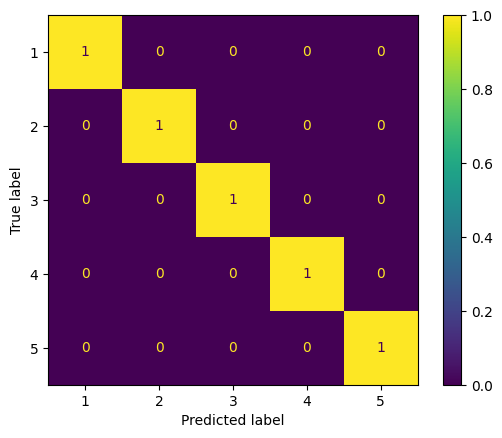

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_predictLR, normalize='true')

### 3.1.4 Métricas de Testing

In [ ]:
print(classification_report(Y_test, Y_test_predictLR))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       458
           2       0.87      0.86      0.86       474
           3       0.71      0.71      0.71       467
           4       0.58      0.57      0.58       484
           5       0.67      0.65      0.66       465

    accuracy                           0.75      2348
   macro avg       0.75      0.75      0.75      2348
weighted avg       0.75      0.75      0.75      2348



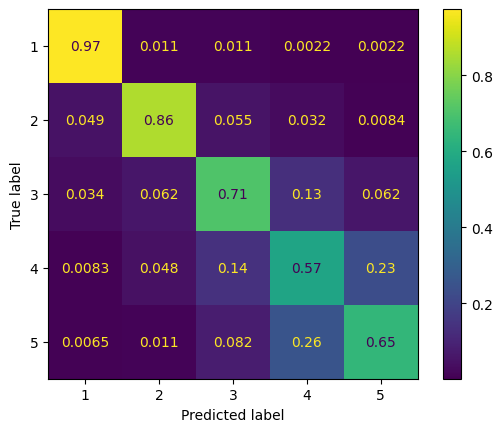

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_predictLR, normalize='true')

## 3.2 Ridge Classifier

### 3.2.1 Definición del modelo y Parametrización

In [ ]:
ridge = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ridge = GridSearchCV(estimator=ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
ridge.fit(X_train, Y_train)

print("Best: %f using %s" % (ridge.best_score_, ridge.best_params_))

Best: 0.723734 using {'alpha': 0.1}


### 3.2.2 Predicción de Clasificaciones

In [ ]:
Y_train_predictRC = ridge.predict(X_train)
Y_test_predictRC = ridge.predict(X_test)

### 3.2.3 Métricas de Training

In [ ]:
print(classification_report(Y_train, Y_train_predictRC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1890
           2       1.00      1.00      1.00      1874
           3       1.00      1.00      1.00      1881
           4       1.00      1.00      1.00      1864
           5       1.00      1.00      1.00      1883

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



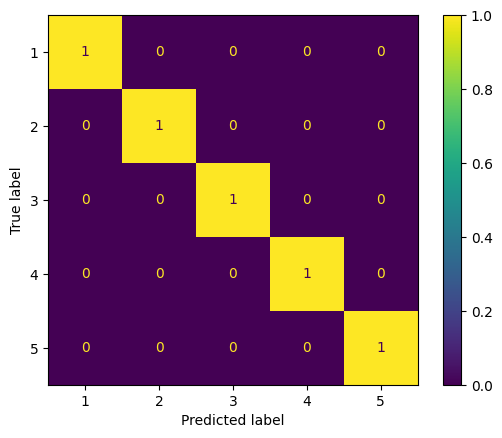

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_predictRC, normalize='true')

### 3.2.4 Métricas de Testing

In [ ]:
print(classification_report(Y_test, Y_test_predictRC))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94       458
           2       0.86      0.86      0.86       474
           3       0.67      0.70      0.68       467
           4       0.58      0.55      0.56       484
           5       0.64      0.61      0.63       465

    accuracy                           0.74      2348
   macro avg       0.73      0.74      0.74      2348
weighted avg       0.73      0.74      0.73      2348



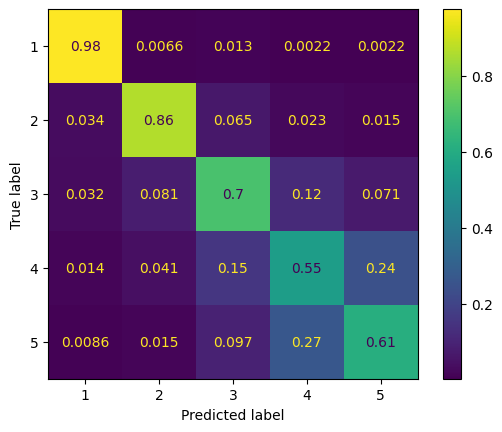

In [ ]:

ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_predictRC, normalize='true')

## 3.3 Support Vector Machine


### 3.3.1 Definición del modelo y Parametrización

In [ ]:
#Tener en cuenta que la ejecuccion de esta celda se demora 25-30 minutos a la hora de entrenar el modelo

paramsSVC = {'kernel': ['poly'],
             'C': [10, 1.0, 0.1, 0.01],
             'gamma': ['scale']
}

svc = SVC()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
svc = GridSearchCV(estimator=svc, param_grid=paramsSVC, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)

svc.fit(X_train, Y_train)


print("Best params: ", svc.best_params_)
print("Score: ", svc.best_score_)

### 3.2.2 Predicción de Clasificaciones

In [ ]:
Y_train_predictSVC = svc.predict(X_train)
Y_test_predictSVC = svc.predict(X_test)

### 3.2.3 Métricas de Training

In [ ]:
print(classification_report(Y_train, Y_train_predictSVC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1890
           2       1.00      1.00      1.00      1874
           3       1.00      1.00      1.00      1881
           4       1.00      1.00      1.00      1864
           5       1.00      1.00      1.00      1883

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



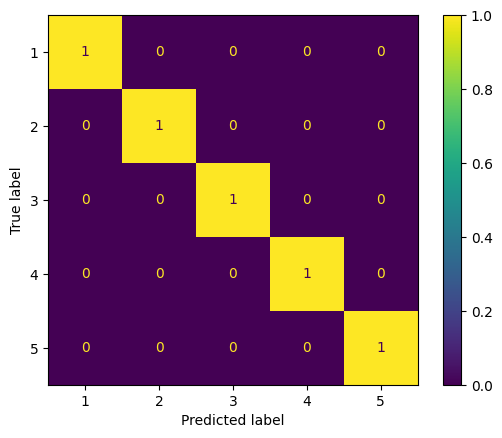

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_predictSVC, normalize='true')

### 3.2.4 Métricas de Testing

In [ ]:
print(classification_report(Y_test, Y_test_predictSVC))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97       458
           2       1.00      0.80      0.89       474
           3       0.95      0.63      0.76       467
           4       0.76      0.48      0.59       484
           5       0.47      0.92      0.62       465

    accuracy                           0.75      2348
   macro avg       0.84      0.76      0.77      2348
weighted avg       0.83      0.75      0.77      2348



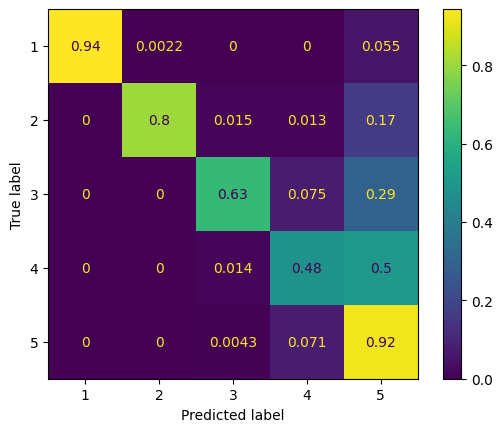

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_predictSVC, normalize='true')